<h2 style="border: 0; border-radius: 15px; font-weight: bold; font-size: 220%; color: brown; text-align: center;">Google Play Games EDA Project</h2>

<img src=https://cdn.mos.cms.futurecdn.net/CT7338P4Bd5VhtWntwh6Gm-1200-80.jpg width="700" height="300">

<div style="background-color: #E6F2FF; padding: 10px;">
<h2 style="border: 0; border-radius: 15px; font-weight: bold; font-size: 220%; color: brown"><center> Content </center></h2>  


- [OVERVIEW](#1)    
- [INSTALLATION](#2)
- [PRICE](#3)
- [PAID](#4)
- [CATEGORY](#5)
- [GROWTH 30 DAYS](#6)
- [GROWTH 60 DAYS](#7)
- [AVERAGE RATING](#8)
- [RANK](#9)
- [SUMMARY](#10)

<div style="background-color: #E6F2FF; padding: 10px;">
<h2 style="border: 0; border-radius: 15px; font-weight: bold; font-size: 220%; color: brown"><center> Introduction </center></h2>  

<span> In this Exploratory Data Analysis (EDA), the dataset named as "Top Games on Google Playstore" under <span>
<span>the 'android-games.csv' file has been analyzed and insights between features tried to be visualized and identified. 

<div>





<div style="background-color: #E6F2FF; font-size: 100%; text-align: left">
    <h2 style="border: 0; border-radius: 15px; font-weight: bold; font-size: 220%; color: brown"><center> Understanding Features </center></h2>
    <ul style="list-style-type: none; padding-left: 0; color: read;">
        <li><strong style="color: #FF6347;">rank:</strong> The rank of the game in the dataset.</li>
        <li><strong style="color: #FF6347;">title:</strong> The title/name of the game.</li>
        <li><strong style="color: #FF6347;">total ratings:</strong> The total number of ratings received by the game.</li>
        <li><strong style="color: #FF6347;">installs:</strong> The number of installs of the game.</li>
        <li><strong style="color: #FF6347;">average rating:</strong> The average rating given by users for the game.</li>
        <li><strong style="color: #FF6347;">growth (30 days):</strong> The growth percentage of the game in the last 30 days.</li>
        <li><strong style="color: #FF6347;">growth (60 days):</strong> The growth percentage of the game in the last 60 days.</li>
        <li><strong style="color: #FF6347;">price:</strong> The price of the game (0 for free games).</li>
        <li><strong style="color: #FF6347;">category:</strong> The category of the game.</li>
        <li><strong style="color: #FF6347;">5 star ratings:</strong> The number of 5-star ratings received by the game.</li>
        <li><strong style="color: #FF6347;">4 star ratings:</strong> The number of 4-star ratings received by the game.</li>
        <li><strong style="color: #FF6347;">3 star ratings:</strong> The number of 3-star ratings received by the game.</li>
        <li><strong style="color: #FF6347;">2 star ratings:</strong> The number of 2-star ratings received by the game.</li>
        <li><strong style="color: #FF6347;">1 star ratings:</strong> The number of 1-star ratings received by the game.</li>
        <li><strong style="color: #FF6347;">paid:</strong> Indicates whether the game is paid or free (1 for paid, 0 for free).</li>
    </ul>
</div>


In [138]:

# Uploading the necessary libraries
###########################################

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from skimpy import clean_columns
import re
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")
from scipy import stats
sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.2f' % x)
import plotly 
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

In [2]:
def NaN_columns(df_full):
    missing_number = df_full.isnull().sum().sort_values(ascending=False)
    missing_percent = (df_full.isnull().sum()/df_full.isnull().count()*100).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values[missing_values['Missing_Percent']>0]

In [3]:
df0 = pd.read_csv("android-games.csv")
df0 = clean_columns(df0, "snake") 
df = df0.copy()

9 column names have been cleaned

<a id="1"></a>
# <p style="background-color: green; font-family:newtimeroman;color:#FFF9ED; font-size:150%; text-align:center;"> OVERVIEW</p>


In [4]:
col = list(df.columns)
col

['rank',
 'title',
 'total_ratings',
 'installs',
 'average_rating',
 'growth_30_days',
 'growth_60_days',
 'price',
 'category',
 '5_star_ratings',
 '4_star_ratings',
 '3_star_ratings',
 '2_star_ratings',
 '1_star_ratings',
 'paid']

In [5]:
df.head()

,rank,title,total_ratings,installs,average_rating,growth_30_days,growth_60_days,price,category,5_star_ratings,4_star_ratings,3_star_ratings,2_star_ratings,1_star_ratings,paid
0,1,Garena Free Fire- World Series,86273129,500.0 M,4,2.10,6.90,0.00,GAME ACTION,63546766,4949507,3158756,2122183,12495915,False
1,2,PUBG MOBILE - Traverse,37276732,500.0 M,4,1.80,3.60,0.00,GAME ACTION,28339753,2164478,1253185,809821,4709492,False
2,3,Mobile Legends: Bang Bang,26663595,100.0 M,4,1.50,3.20,0.00,GAME ACTION,18777988,1812094,1050600,713912,4308998,False
3,4,Brawl Stars,17971552,100.0 M,4,1.40,4.40,0.00,GAME ACTION,13018610,1552950,774012,406184,2219794,False
4,5,Sniper 3D: Fun Free Online FPS Shooting Game,14464235,500.0 M,4,0.80,1.50,0.00,GAME ACTION,9827328,2124154,1047741,380670,1084340,False


In [6]:
df.title.value_counts()

Solitaire                                            36
Word Search                                           9
Spider Solitaire                                      7
Bubble Shooter                                        4
Sudoku                                                2
                                                     ..
Stars Slots - Casino Games                            1
Best Casino Free Slots: Casino Slot Machine Games     1
Bingo Journey - Lucky & Fun Casino Bingo Games        1
Slots: Get Rich Free Slots Casino Games Offline       1
Pinturillo 2                                          1
Name: title, Length: 1675, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1730 entries, 0 to 1729
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   rank            1730 non-null   int64  
 1   title           1730 non-null   object 
 2   total_ratings   1730 non-null   int64  
 3   installs        1730 non-null   object 
 4   average_rating  1730 non-null   int64  
 5   growth_30_days  1730 non-null   float64
 6   growth_60_days  1730 non-null   float64
 7   price           1730 non-null   float64
 8   category        1730 non-null   object 
 9   5_star_ratings  1730 non-null   int64  
 10  4_star_ratings  1730 non-null   int64  
 11  3_star_ratings  1730 non-null   int64  
 12  2_star_ratings  1730 non-null   int64  
 13  1_star_ratings  1730 non-null   int64  
 14  paid            1730 non-null   bool   
dtypes: bool(1), float64(3), int64(8), object(3)
memory usage: 191.0+ KB


In [8]:
df.describe()

,rank,total_ratings,average_rating,growth_30_days,growth_60_days,price,5_star_ratings,4_star_ratings,3_star_ratings,2_star_ratings,1_star_ratings
count,1730.00,1730.00,1730.00,1730.00,1730.00,1730.00,1730.00,1730.00,1730.00,1730.00,1730.00
mean,50.39,1064331.92,3.91,321.74,122.55,0.01,762231.47,116436.58,57063.07,27103.36,101494.95
std,28.94,3429249.52,0.29,6018.91,2253.89,0.21,2538658.07,302163.06,149531.41,81545.42,408374.53
min,1.00,32993.00,2.00,0.00,0.00,0.00,13975.00,2451.00,718.00,266.00,545.00
25%,25.00,175999.25,4.00,0.10,0.20,0.00,127730.00,20643.00,9652.50,4262.25,12812.00
50%,50.00,428606.50,4.00,0.50,1.00,0.00,296434.00,50980.50,25078.00,10675.50,33686.00
75%,75.00,883797.00,4.00,1.70,3.30,0.00,619835.75,101814.00,52295.00,23228.75,80157.25
max,100.00,86273129.00,4.00,227105.70,69441.40,7.49,63546766.00,5404966.00,3158756.00,2122183.00,12495915.00


In [9]:
df.describe(include = object)


,title,installs,category
count,1730,1730,1730
unique,1675,9,17
top,Solitaire,10.0 M,GAME CARD
freq,36,805,126


In [112]:
# No NaN value has been identified
NaN_columns(df)

,Missing_Number,Missing_Percent


In [11]:
df.nunique()

rank               100
title             1675
total_ratings     1699
installs             9
average_rating       3
growth_30_days     186
growth_60_days     206
price                6
category            17
5_star_ratings    1697
4_star_ratings    1692
3_star_ratings    1677
2_star_ratings    1653
1_star_ratings    1686
paid                 2
dtype: int64

In [111]:
# No dublicate value has been identified
df.duplicated().value_counts()

False    1730
dtype: int64

In [13]:
df.category.unique()

array(['GAME ACTION', 'GAME ADVENTURE', 'GAME ARCADE', 'GAME BOARD',
       'GAME CARD', 'GAME CASINO', 'GAME CASUAL', 'GAME EDUCATIONAL',
       'GAME MUSIC', 'GAME PUZZLE', 'GAME RACING', 'GAME ROLE PLAYING',
       'GAME SIMULATION', 'GAME SPORTS', 'GAME STRATEGY', 'GAME TRIVIA',
       'GAME WORD'], dtype=object)

<a id="2"></a>
# <p style="background-color: green; font-family:newtimeroman;color:#FFF9ED; font-size:150%; text-align:center;"> Installation</p>


#### Installation column has been rearranged in order to apply better analyzing techniques

In [14]:
df.installs.unique()

array(['500.0 M', '100.0 M', '50.0 M', '10.0 M', '5.0 M', '1.0 M',
       '1000.0 M', '500.0 k', '100.0 k'], dtype=object)

In [15]:
df.installs = df.installs.apply(lambda x: 0.5 if x == "500.0 k" else 0.1 if x == "100.0 k" else x.replace("M", ""))


In [16]:
df.installs = df.installs.astype("float")

In [17]:
df = df.rename(columns={"installs" : "installs_million"})

In [91]:
game_install = df.groupby('title')['installs_million'].apply(np.mean).sort_values(ascending=False).head(10)
game_install

title
Subway Surfers                                 1000.00
Candy Crush Saga                               1000.00
Ludo King™                                      500.00
8 Ball Pool                                     500.00
Hill Climb Racing                               500.00
Sniper 3D: Fun Free Online FPS Shooting Game    500.00
PUBG MOBILE - Traverse                          500.00
Clash of Clans                                  500.00
Temple Run                                      500.00
Temple Run 2                                    500.00
Name: installs_million, dtype: float64

In [93]:
col

['rank',
 'title',
 'total_ratings',
 'installs_million',
 'average_rating',
 'growth_30_days',
 'growth_60_days',
 'price',
 'category',
 '5_star_ratings',
 '4_star_ratings',
 '3_star_ratings',
 '2_star_ratings',
 '1_star_ratings',
 'paid']

In [94]:
top_10_by_installation = df.sort_values(by='installs_million', ascending=False)[['title','category', 'installs_million', '5_star_ratings', 'total_ratings']].head(10)
top_10_by_installation

,title,category,installs_million,5_star_ratings,total_ratings
200,Subway Surfers,GAME ARCADE,1000.00,27138572,35665901
626,Candy Crush Saga,GAME CASUAL,1000.00,23837448,31367945
0,Garena Free Fire- World Series,GAME ACTION,500.00,63546766,86273129
207,Temple Run,GAME ARCADE,500.00,3184391,4816448
1426,Clash of Clans,GAME STRATEGY,500.00,43346128,55766763
1026,Hill Climb Racing,GAME RACING,500.00,7148370,10188038
1326,8 Ball Pool,GAME SPORTS,500.00,16281475,21632735
630,Pou,GAME CASUAL,500.00,8175679,11506051
628,My Talking Angela,GAME CASUAL,500.00,9165205,13050503
1,PUBG MOBILE - Traverse,GAME ACTION,500.00,28339753,37276732


In [97]:
fig = px.bar(top_10_by_installation, x= 'title', y='installs_million', hover_data = top_10_by_installation[['category']], color='category', title='Top 10 Games By Installation')
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

In [101]:
fig = px.histogram(df, x= 'installs_million', title='The Number of Games Installed in Millions')
fig.show()

<a id="3"></a>
# <p style="background-color: green; font-family:newtimeroman;color:#FFF9ED; font-size:150%; text-align:center;"> Price</p>


In [18]:
df.head()

,rank,title,total_ratings,installs_million,average_rating,growth_30_days,growth_60_days,price,category,5_star_ratings,4_star_ratings,3_star_ratings,2_star_ratings,1_star_ratings,paid
0,1,Garena Free Fire- World Series,86273129,500.00,4,2.10,6.90,0.00,GAME ACTION,63546766,4949507,3158756,2122183,12495915,False
1,2,PUBG MOBILE - Traverse,37276732,500.00,4,1.80,3.60,0.00,GAME ACTION,28339753,2164478,1253185,809821,4709492,False
2,3,Mobile Legends: Bang Bang,26663595,100.00,4,1.50,3.20,0.00,GAME ACTION,18777988,1812094,1050600,713912,4308998,False
3,4,Brawl Stars,17971552,100.00,4,1.40,4.40,0.00,GAME ACTION,13018610,1552950,774012,406184,2219794,False
4,5,Sniper 3D: Fun Free Online FPS Shooting Game,14464235,500.00,4,0.80,1.50,0.00,GAME ACTION,9827328,2124154,1047741,380670,1084340,False


In [19]:
pd.crosstab(df.price, df.installs_million)

installs_million,0.10,0.50,1.00,5.00,10.00,50.00,100.00,500.00,1000.00
price,,,,,,,,,
0.00,2,13,189,245,804,252,204,12,2
0.99,0,0,1,0,0,0,0,0,0
1.49,1,0,0,0,0,0,0,0,0
1.99,0,1,2,0,0,0,0,0,0
2.99,0,1,0,0,0,0,0,0,0
7.49,0,0,0,0,1,0,0,0,0


In [20]:
df.corr()[["price"]]

,price
rank,-0.01
total_ratings,0.01
installs_million,-0.02
average_rating,0.02
growth_30_days,-0.00
growth_60_days,-0.00
price,1.00
5_star_ratings,0.01
4_star_ratings,0.00
3_star_ratings,0.00


In [21]:
df.price.value_counts()

0.00    1723
1.99       3
7.49       1
2.99       1
1.49       1
0.99       1
Name: price, dtype: int64

##### Most of the games in Google Play Store has price as zero. It is quite common because  Players do not preffer to pay and adverstisement and payments in apllication is leads to more desirable outputs from seller point of view.
##### It has been concluded that Paid feature is sufficient to analyze and Price feature can be dropped

In [22]:
#df.drop("price", axis=1, inplace=True)

<a id="4"></a>
# <p style="background-color: green; font-family:newtimeroman;color:#FFF9ED; font-size:150%; text-align:center;"> Paid</p>


In [23]:
df.paid.value_counts()

False    1723
True        7
Name: paid, dtype: int64

In [24]:
pd.crosstab(df.average_rating, df.paid)

paid,False,True
average_rating,,
2,1,0
3,157,0
4,1565,7


In [25]:
pd.crosstab(df.average_rating, df.installs_million)

installs_million,0.10,0.50,1.00,5.00,10.00,50.00,100.00,500.00,1000.00
average_rating,,,,,,,,,
2,0,0,0,0,1,0,0,0,0
3,0,0,16,26,82,19,14,0,0
4,3,15,176,219,722,233,190,12,2


In [26]:
df.groupby(['paid', 'average_rating'])[['installs_million']].mean()


installs_million
paid  average_rating                  
False 2                          10.00
      3                          21.12
      4                          30.12
True  4                           2.01

##### Pre-paid the games in Google Play Store  has relatively lower installation. However, sample size of paid are not sufficient to reach any conclusion

In [106]:
df.groupby(['paid'])[["average_rating", 'installs_million']].mean()


,average_rating,installs_million
paid,,
False,4.32,29.29
True,4.57,2.01


In [104]:
df_paid_notpaid= df['paid'].value_counts()
label =['Free','NotPaid']
fig = px.pie(df_paid_notpaid, values=df['paid'].value_counts().values, names=label,
             title='Paid & Free Games')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

##### Pre-paid the games in Google Play Store  has relatively higher score. However, sample size of paid are not sufficient to reach any conclusion

<a id="5"></a>
# <p style="background-color: green; font-family:newtimeroman;color:#FFF9ED; font-size:150%; text-align:center;"> Category</p>


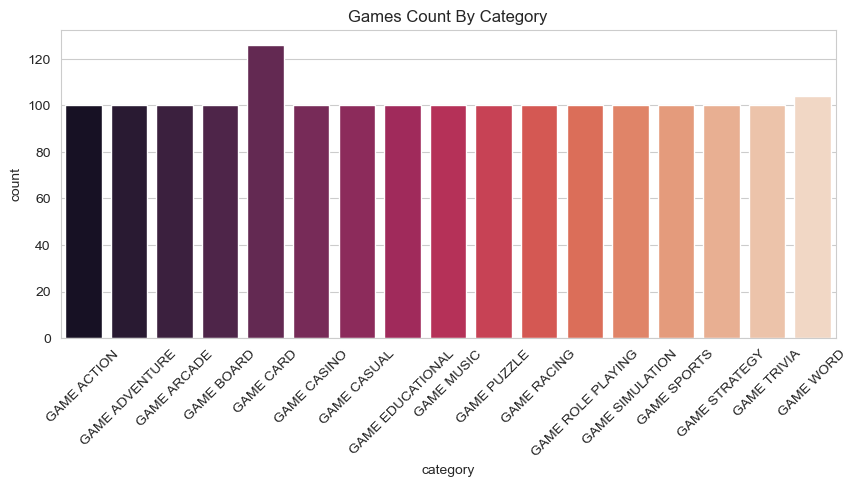

In [73]:
plt.figure(figsize=(10,4))
sns.countplot(x = "category", data = df, palette = "rocket")
plt.xticks(rotation = 45)
plt.title("Games Count By Category");

In [30]:
cat_rat = df.groupby('category')['total_ratings'].apply(np.mean).sort_values(ascending=False)
cat_rat

category
GAME ACTION         4011343.60
GAME CASUAL         2470866.04
GAME STRATEGY       1856569.75
GAME ARCADE         1793779.91
GAME SPORTS         1353828.82
GAME RACING         1139026.80
GAME PUZZLE          946692.92
GAME SIMULATION      934141.65
GAME ADVENTURE       893561.74
GAME ROLE PLAYING    708764.83
GAME BOARD           445743.07
GAME WORD            394360.33
GAME CASINO          361903.09
GAME CARD            332604.10
GAME TRIVIA          298221.72
GAME MUSIC           216302.02
GAME EDUCATIONAL     152980.35
Name: total_ratings, dtype: float64

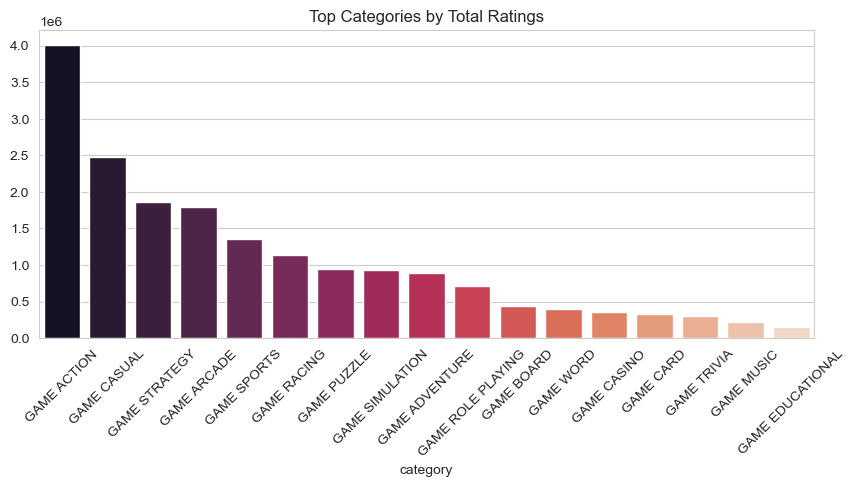

In [75]:
plt.figure(figsize=(10,4))
sns.barplot(x = cat_rat.index, y = cat_rat.values , palette = "rocket")
plt.xticks(rotation = 45)
plt.title("Top Categories by Total Ratings");

In [32]:
cat_install = df.groupby('category')['installs_million'].apply(np.mean).sort_values(ascending=False)

In [80]:
fig = px.bar(data_frame=cat_install, x= cat_install.index, y=cat_install.values, labels={'y':'Average Installation'},
            title='Top Categories By Installation')
fig.update_layout(xaxis=go.layout.XAxis(tickangle=90))
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

##### Action, Arcade, Casual, Racing categories have relatively higher installation Amounts.  It can be concluded that Total Rating and Installions are correlated. 5 star ratings are compared in order to have more accurate comparison

In [34]:
cat_rat_5 = df.groupby('category')['5_star_ratings'].apply(np.mean).sort_values(ascending=False)

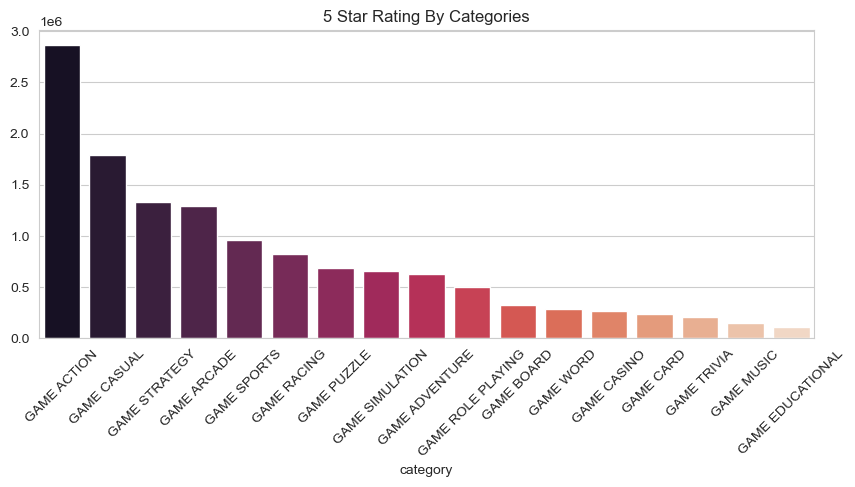

In [81]:
plt.figure(figsize=(10,4))
sns.barplot(x = cat_rat_5.index, y = cat_rat_5.values , palette = "rocket")
plt.title("5 Star Rating By Categories")
plt.xticks(rotation = 45);

##### Action, Arcade, Casual, Racing categories have relatively higher installation Amounts.  It can be concluded that Top 5 categories and  Installions are correlated.

<a id="6"></a>
# <p style="background-color: green; font-family:newtimeroman;color:#FFF9ED; font-size:150%; text-align:center;"> Growth 30 Days</p>


In [36]:
growth_30 = df.groupby('category')[['growth_30_days']].mean().sort_values(by = 'growth_30_days', ascending = False)
growth_30.head()

,growth_30_days
category,
GAME CASINO,2335.25
GAME TRIVIA,1079.68
GAME CARD,746.60
GAME ADVENTURE,259.10
GAME ROLE PLAYING,209.98


In [37]:
growth_30_title = df.groupby(['title', "category", "rank"])[['growth_30_days']].mean().sort_values(by = 'growth_30_days', ascending = False)
growth_30_title.head(10)

,,,growth_30_days
title,category,rank,
Dummy ดัมมี่ ไพ่แคง เกมไพ่ฟรี,GAME CASINO,21,227105.70
Gartic,GAME TRIVIA,12,69928.50
Belote.com - Free Belote Game,GAME CARD,50,55880.60
Durak Online,GAME CARD,18,37994.40
New QuizDuel!,GAME TRIVIA,65,28062.90
세븐나이츠,GAME ROLE PLAYING,16,17025.00
Mini World: Block Art,GAME ADVENTURE,7,15364.20
Truck Driver Cargo,GAME RACING,81,12602.30
Mobile Soccer League,GAME SPORTS,81,9750.20


##### It can be concluded that Games with highest growth rates in first 30 and 60 days certainly be new and in the top 100 ranking. It can also be identified that category of top growt games are inline with highest growth rates by categories . 

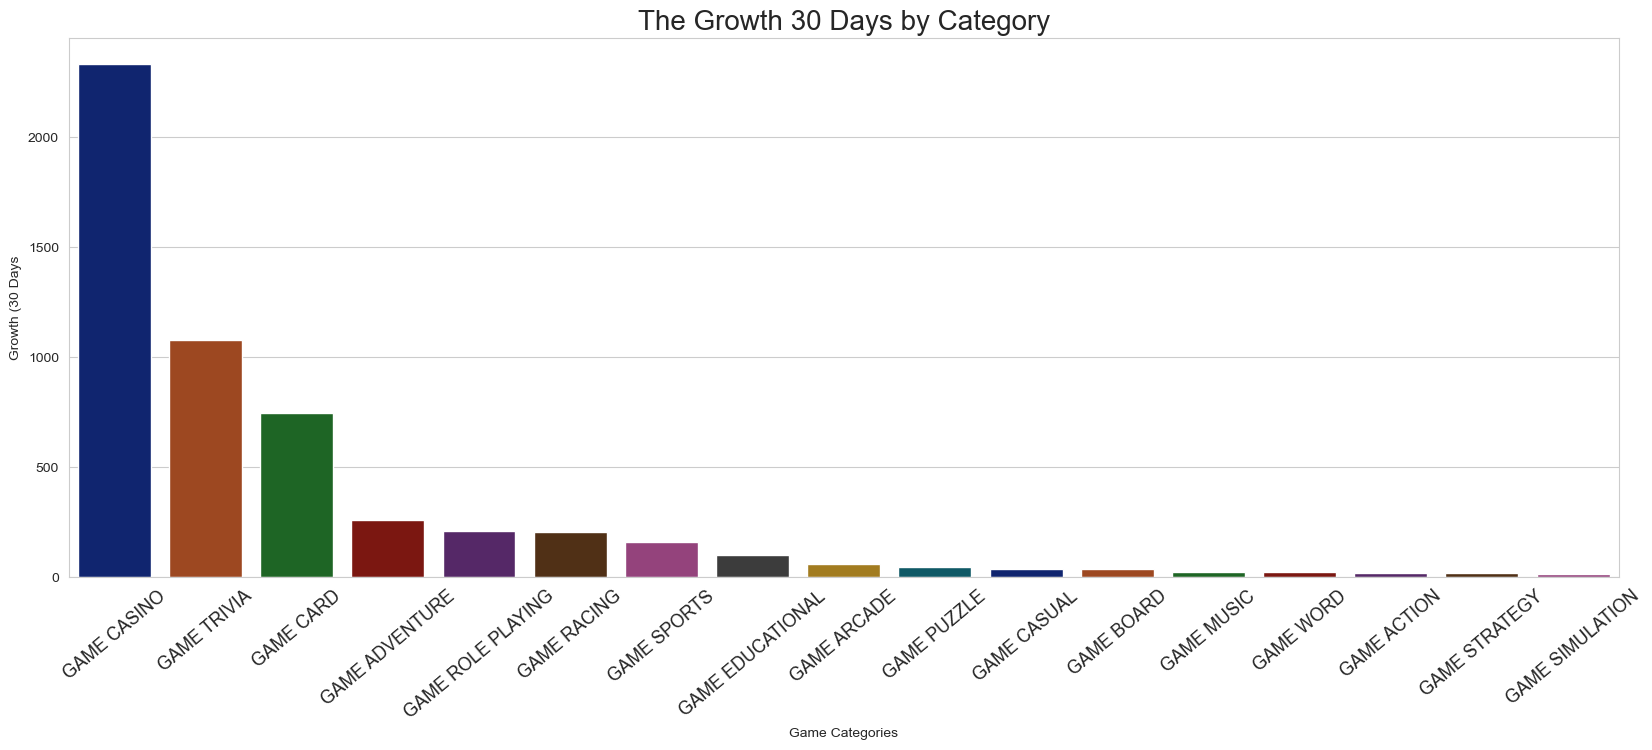

In [38]:
plt.figure(figsize=(20,7))
sns.barplot(x='category', y='growth_30_days', data=df, order= growth_30.index, ci = False, palette="dark").set(xlabel="Game Categories", ylabel='Growth (30 Days')
plt.xticks(rotation = 40, size = 13)
plt.title('The Growth 30 Days by Category', size = 20)
plt.show();

##### Top 5  game categories are 'CASINO', 'TRIVIA', 'CARD', 'ADVENTURE' and 'ROLE PLAYING',have higher growth rate in the first 30-day period

<a id="7"></a>
# <p style="background-color: green; font-family:newtimeroman;color:#FFF9ED; font-size:150%; text-align:center;"> Growth 60 Days</p>


In [39]:
df[["growth_30_days", "growth_60_days"]]

,growth_30_days,growth_60_days
0,2.10,6.90
1,1.80,3.60
2,1.50,3.20
3,1.40,4.40
4,0.80,1.50
...,...,...
1725,0.90,1.80
1726,0.90,2.30
1727,0.90,1.90
1728,1.90,4.10


In [40]:
df.corr()[["growth_30_days", "growth_60_days"]]

,growth_30_days,growth_60_days
rank,-0.04,-0.01
total_ratings,-0.01,-0.00
installs_million,-0.01,-0.00
average_rating,-0.02,0.00
growth_30_days,1.00,-0.00
growth_60_days,-0.00,1.00
price,-0.00,-0.00
5_star_ratings,-0.01,-0.00
4_star_ratings,-0.01,-0.01
3_star_ratings,-0.01,-0.01


In [41]:
col = list(df.columns)
col

['rank',
 'title',
 'total_ratings',
 'installs_million',
 'average_rating',
 'growth_30_days',
 'growth_60_days',
 'price',
 'category',
 '5_star_ratings',
 '4_star_ratings',
 '3_star_ratings',
 '2_star_ratings',
 '1_star_ratings',
 'paid']

In [42]:
growth_60 = df.groupby('category')[['growth_60_days']].mean().sort_values(by = 'growth_60_days', ascending = False)
growth_60.head()

,growth_60_days
category,
GAME BOARD,587.89
GAME CARD,555.34
GAME STRATEGY,435.44
GAME ACTION,118.29
GAME RACING,88.96


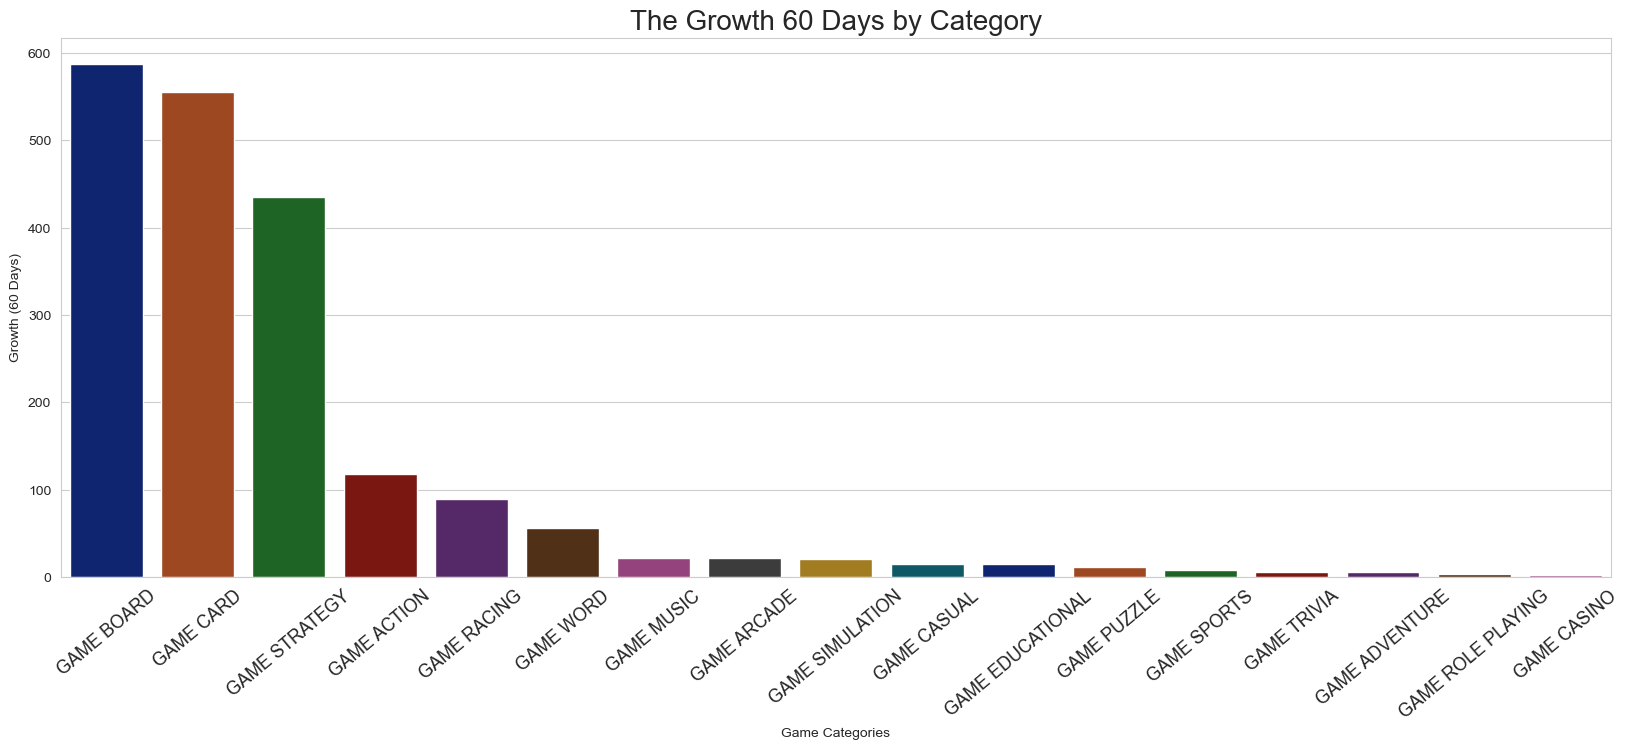

In [43]:
plt.figure(figsize=(20,7))
sns.barplot(x='category', y='growth_60_days', data=df, order= growth_60.index, ci = False, palette="dark").set(xlabel="Game Categories", ylabel='Growth (60 Days)')                                                                                                            
plt.xticks(rotation = 40, size = 13)
plt.title('The Growth 60 Days by Category', size = 20)
plt.show();

##### Top 5  game categories are 'CASINO', 'TRIVIA', 'CARD', 'ADVENTURE' and 'ROLE PLAYING',have higher growth rate in the first 30-day period, 'BOARD', 'CARD', 'STRATEGY', 'ACTION' and'RACING' are the top 5 game categories has higher growth rate in the first 60-day period. 'GAME CARD' has  higher growth rates in both groups. 

In [44]:
col

['rank',
 'title',
 'total_ratings',
 'installs_million',
 'average_rating',
 'growth_30_days',
 'growth_60_days',
 'price',
 'category',
 '5_star_ratings',
 '4_star_ratings',
 '3_star_ratings',
 '2_star_ratings',
 '1_star_ratings',
 'paid']

In [45]:
g_60 = df.groupby('category')[['growth_60_days', "5_star_ratings", "installs_million","average_rating" ]].mean().sort_values(by = 'growth_60_days', ascending = False).head(10)
g_60

,growth_60_days,5_star_ratings,installs_million,average_rating
category,,,,
GAME BOARD,587.89,319715.39,21.23,3.93
GAME CARD,555.34,237157.21,12.48,3.94
GAME STRATEGY,435.44,1332998.92,23.91,3.88
GAME ACTION,118.29,2867935.95,74.10,3.89
GAME RACING,88.96,819115.00,46.75,3.96
GAME WORD,55.72,285678.05,12.32,3.94
GAME MUSIC,22.16,150576.03,12.49,3.80
GAME ARCADE,21.97,1296029.78,71.61,3.91
GAME SIMULATION,20.20,652676.24,27.71,3.94


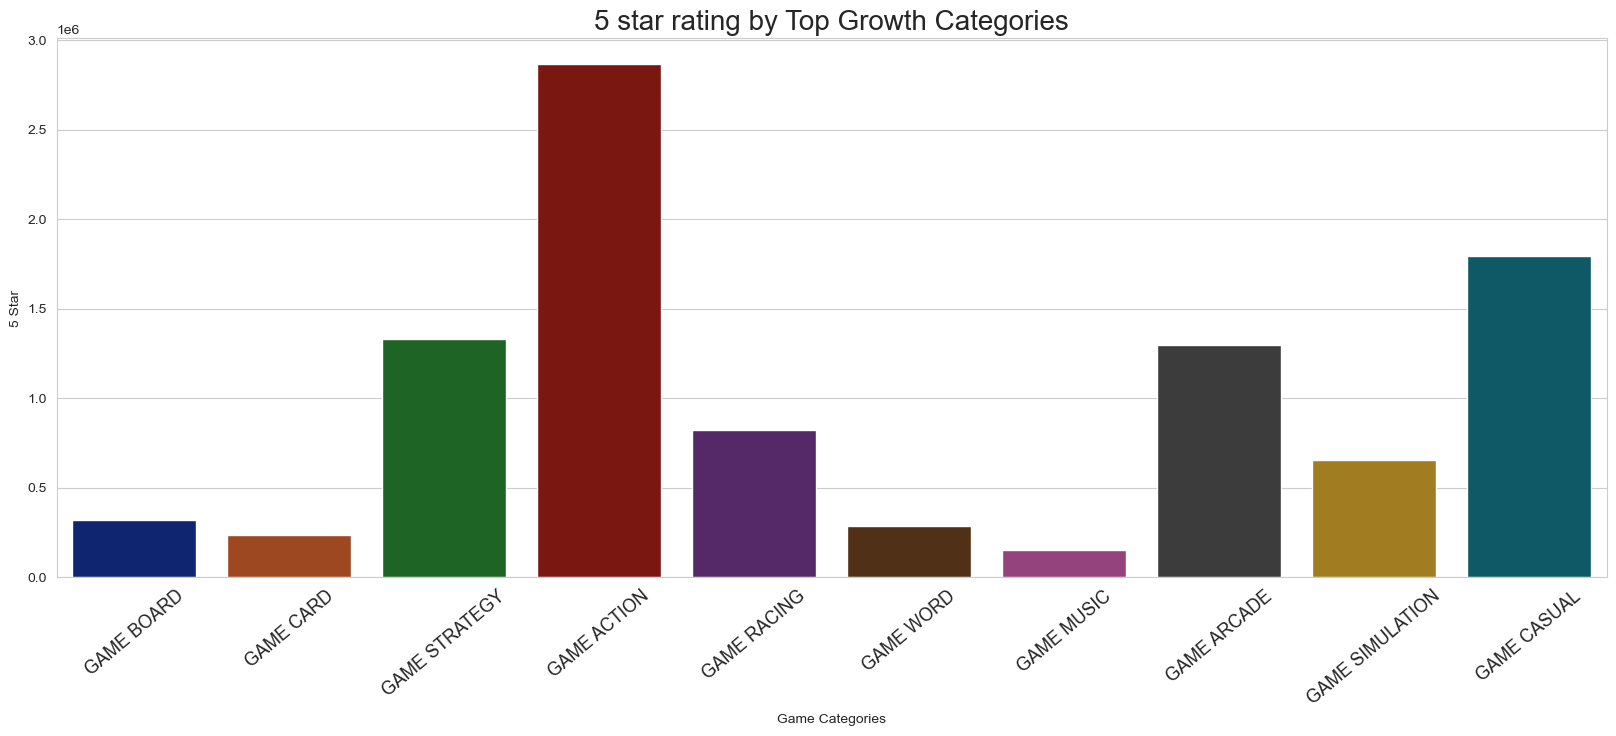

In [46]:
plt.figure(figsize=(20,7))
sns.barplot(x='category', y='5_star_ratings', data=df, order= g_60.index, ci = False, palette="dark").set(xlabel="Game Categories", ylabel='5 Star')                                                                                                            
plt.xticks(rotation = 40, size = 13)
plt.title('5 star rating by Top Growth Categories', size = 20)
plt.show();

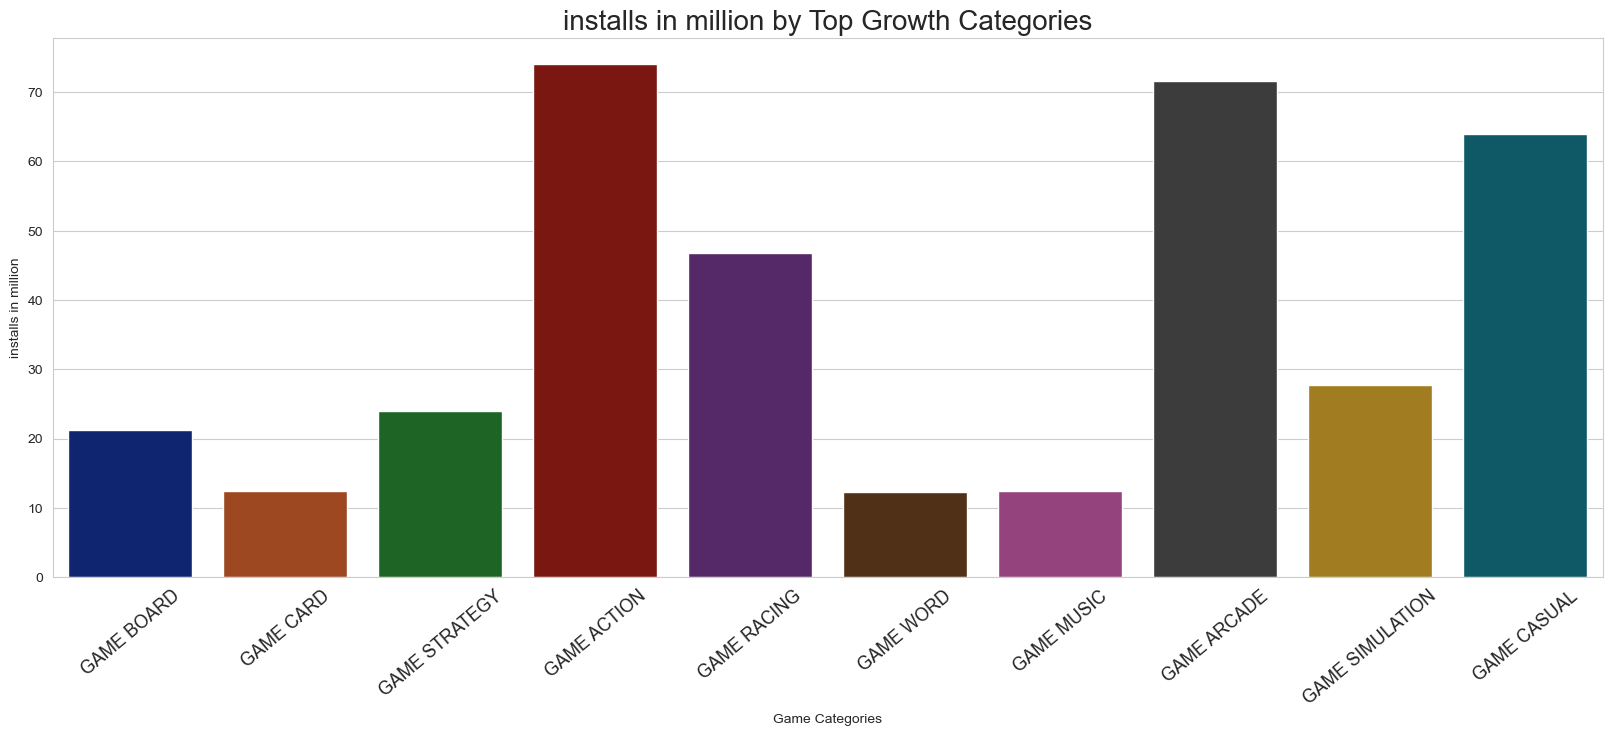

In [47]:
plt.figure(figsize=(20,7))
sns.barplot(x='category', y='installs_million', data=df, order= g_60.index, ci = False, palette="dark").set(xlabel="Game Categories", ylabel='installs in million')                                                                                                            
plt.xticks(rotation = 40, size = 13)
plt.title('installs in million by Top Growth Categories', size = 20)
plt.show();

##### According to Installation and Growth 60 days, Most installed games 

In [48]:
growth_60_title = df.groupby(['title', "category", "rank" ])[['growth_60_days']].mean().sort_values(by = 'growth_60_days', ascending = False)
growth_60_title.head(10)

,,,growth_60_days
title,category,rank,
Domino QiuQiu 2020 - Domino 99 · Gaple online,GAME CARD,43,69441.40
Carrom King™ - Best Online Carrom Board Pool Game,GAME BOARD,65,42875.20
Castle Clash: Схватка Гильдий,GAME STRATEGY,15,41869.70
인생역전윷놀이,GAME BOARD,75,15483.90
Special Forces Group 2,GAME ACTION,25,7584.90
Racing Fever: Moto,GAME RACING,53,6004.40
Aplasta Palabras：Juego de Palabras Gratis sin wifi,GAME WORD,61,5556.20
Talking Tom Gold Run,GAME ACTION,14,4012.80
Moto Racer 3D,GAME RACING,79,2716.50


##### It can be concluded that Games with highest growth rates in first 30 and 60 days certainly be new and in the top 100 ranking. It can also be identified that category of top growth games are inline with highest growth rates by categories . 

<a id="8"></a>
# <p style="background-color: green; font-family:newtimeroman;color:#FFF9ED; font-size:150%; text-align:center;"> Average Rating</p>


In [122]:
# Average Rating has been recalcutated via 5,4,3,2,1 star ratings in oder to have better insight

In [61]:
df["average_rating"] = (df["5_star_ratings"]*5 + 
                        df["4_star_ratings"]*4 + 
                        df["3_star_ratings"]*3 + 
                        df["2_star_ratings"]*2 + 
                        df["1_star_ratings"]*1)/(df["5_star_ratings"] + 
                        df["4_star_ratings"] + 
                        df["3_star_ratings"] + 
                        df["2_star_ratings"] + 
                        df["1_star_ratings"])

df["average_rating"]

0      4.22
1      4.30
2      4.13
3      4.27
4      4.33
       ... 
1725   4.76
1726   4.68
1727   4.05
1728   4.82
1729   3.59
Name: average_rating, Length: 1730, dtype: float64

In [68]:
Av_Rate = df.groupby('category')[['average_rating', "5_star_ratings", "installs_million" ]].mean().head(15)
Av_Rate

,average_rating,5_star_ratings,installs_million
category,,,
GAME ACTION,4.26,2867935.95,74.10
GAME ADVENTURE,4.26,630051.71,18.03
GAME ARCADE,4.29,1296029.78,71.61
GAME BOARD,4.33,319715.39,21.23
GAME CARD,4.42,237157.21,12.48
GAME CASINO,4.45,268097.41,7.71
GAME CASUAL,4.35,1792713.79,63.97
GAME EDUCATIONAL,4.25,108591.62,17.89
GAME MUSIC,4.20,150576.03,12.49


In [114]:
df.corr()[["installs_million"]]

,installs_million
rank,-0.33
total_ratings,0.68
installs_million,1.00
average_rating,-0.04
growth_30_days,-0.01
growth_60_days,-0.00
price,-0.02
5_star_ratings,0.67
4_star_ratings,0.72
3_star_ratings,0.72


#### As seen above and below Average rating has no reliable effect on installation.

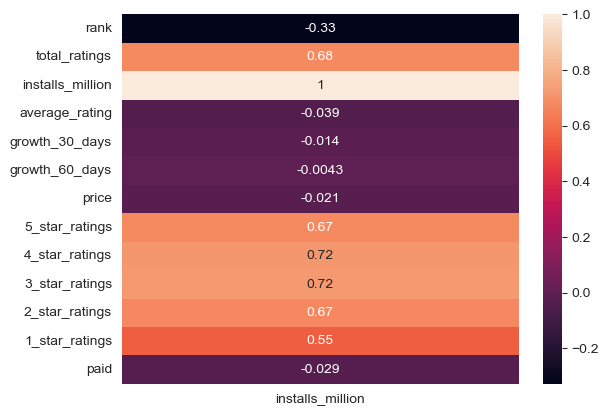

In [120]:
sns.heatmap(df.corr()[["installs_million"]], annot=True);

<a id="9"></a>
# <p style="background-color: green; font-family:newtimeroman;color:#FFF9ED; font-size:150%; text-align:center;"> Rank</p>


In [123]:
col

['rank',
 'title',
 'total_ratings',
 'installs_million',
 'average_rating',
 'growth_30_days',
 'growth_60_days',
 'price',
 'category',
 '5_star_ratings',
 '4_star_ratings',
 '3_star_ratings',
 '2_star_ratings',
 '1_star_ratings',
 'paid']

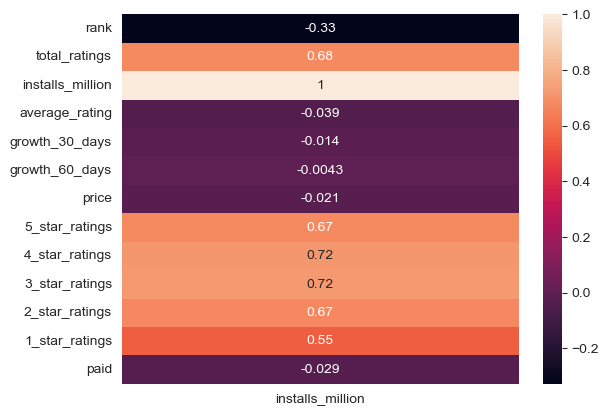

In [125]:
sns.heatmap(df.corr()[["installs_million"]], annot=True);

In [127]:
Av_Rate = df.groupby('rank')[['average_rating', "5_star_ratings", "installs_million" ]].mean().head(20)
Av_Rate

,average_rating,5_star_ratings,installs_million
rank,,,
1,4.36,13295953.41,309.41
2,4.33,6628260.94,128.24
3,4.39,3351010.35,96.50
4,4.32,3225707.00,65.35
5,4.32,2691982.53,103.53
6,4.40,2547944.59,59.41
7,4.34,2083426.88,53.53
8,4.28,1965384.06,102.94
9,4.39,1820203.00,48.53


In [135]:
import plotly.express as px
fig = px.bar(df.head(15), x='rank', y='installs_million', text='installs_million'
             )

fig.update_traces(texttemplate='%{text:.3s}', textposition='outside')
fig.update_layout({'plot_bgcolor': 'white',
                   'paper_bgcolor': 'white'})

fig.update_layout(width=900, height=400,
                  margin = dict(t=15, l=15, r=15, b=15))
fig.show()

#### From the Chart below it can be certainly identified that  Ranking of a Game has been calculated according to Total Rating of a game. 

In [137]:
fig = px.bar(df.head(15), x='rank', y='total_ratings', text='total_ratings'
             )

fig.update_traces(texttemplate='%{text:.3s}', textposition='outside')
fig.update_layout({'plot_bgcolor': 'white',
                   'paper_bgcolor': 'white'})

fig.update_layout(width=900, height=400,
                  margin = dict(t=15, l=15, r=15, b=15))
fig.show()

<a id="10"></a>
# <p style="background-color: green; font-family:newtimeroman;color:#FFF9ED; font-size:150%; text-align:center;">Summary</p>


##### It can be concluded that Games with highest growth rates in first 30 and 60 days certainly be new and in the top 100 ranking. It can also be identified that category of top growth games are inline with highest growth rates by categories . 

##### Pre-paid  games in Google Play Store  has relatively lower installation but higher average rating. However, sample size of paid are not sufficient to reach any conclusion

##### TOP 10 categories in terms of 5 star rating also represents higher installation and higher ranking.

##### TOP 10 games  are on  8+ year on average and compatible with playing on social media, PC.

##### Casino game have highest growht rate in first 30 day but one of the lowest in 60 days. Because of Online gambling ban and other restrictions Casino Games have tendancy to be banned compared to other categories.

#### it is concluded that Average Rating has no significant effect on installation. However, as Total Rating Count has direct effect On Installation 

#### Total Rating has direct effect on determining Ranking of games.